In [50]:
#Import Dependencies
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

# The questions are not in the same order here as they are on Preprocessing Google Document. All questions are answered.

In [51]:
# Read CSV
filepath = "../Resources/cleaned_dataframe.csv"
clean_data = pd.read_csv(filepath)
clean_data.head()

,Start Date,End Date,Length of Lease,Lease Sizes,Country,State,State Category,Zip Code,Regions,Rentable Sqft,Usable Sqft,Structured Parking Spaces,Surface Parking Spaces,Surface Sizes,Rent Amount
0,2022-10-01,2027-09-30,1825,Medium 1000-2999,US,MN,Other,55121,Region 5,0.0,0.0,0,0,Small 0-49,3353.24
1,2018-01-01,2027-12-31,3651,Long 3000-4999,US,NY,NY,10604,Region 1,41105.0,37395.0,0,164,XLarge 100-249,985559.60
2,2013-06-01,2028-05-31,5478,Very Long 5000-15000,US,NY,NY,10017,Region 1,5773.0,5020.0,1,7,Small 0-49,198243.17
3,2014-09-01,2029-08-31,5478,Very Long 5000-15000,US,CT,Other,6108,Region 0,17328.0,15150.0,0,0,Small 0-49,440195.57
4,2022-08-15,2037-08-14,5478,Very Long 5000-15000,US,CT,Other,6103,Region 0,58601.0,51859.0,18,0,Small 0-49,2488641.67


In [19]:
#Write a function that generates a scatterplot and linear regression for multiple features

def scatterregression(dataframe , feature_one , feature_two , picture_path):

    (slope , intercept , rvalue , pvalue , stderr) = linregress(dataframe[feature_one] , dataframe[feature_two])

    regressionvalues = dataframe[feature_one]*slope + intercept
    line = f"y = {round(slope,2)}x + {round(intercept,2)}"
    line2 = f"R^2: {round(rvalue**2,2)}"
    
    plt.scatter(dataframe[feature_one] , dataframe[feature_two])
    plt.xlabel(feature_one)
    plt.ylabel(feature_two)
    plt.title(f"{feature_two} vs. {feature_one}")

    plt.plot(dataframe[feature_one], regressionvalues , color = 'red')
    plt.annotate(line , (min(dataframe[feature_one]),min(regressionvalues)),color = 'red' , fontsize = 20)
    plt.annotate(line2,(.5* max(dataframe[feature_one]),.85*max(dataframe[feature_two])),color = 'red', fontsize = 20)
    
    plt.grid()
    plt.tight_layout()
    plt.savefig(picture_path)
    plt.show()

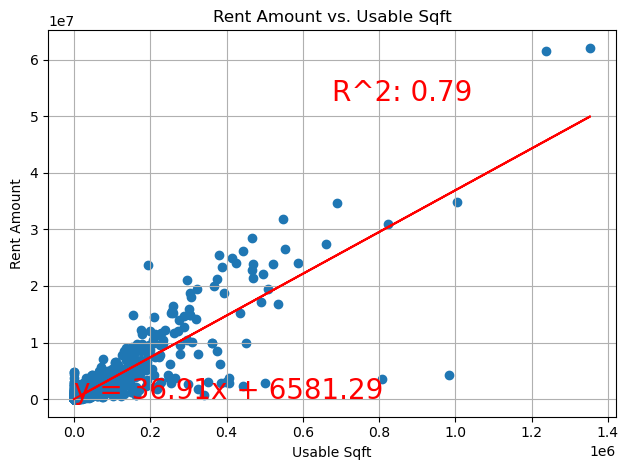

In [20]:
#Analyze Usable Sqft and Rent Amount
scatterregression(clean_data, "Usable Sqft","Rent Amount", "../Resources/UsablesqftvsRentAmount.jpg")

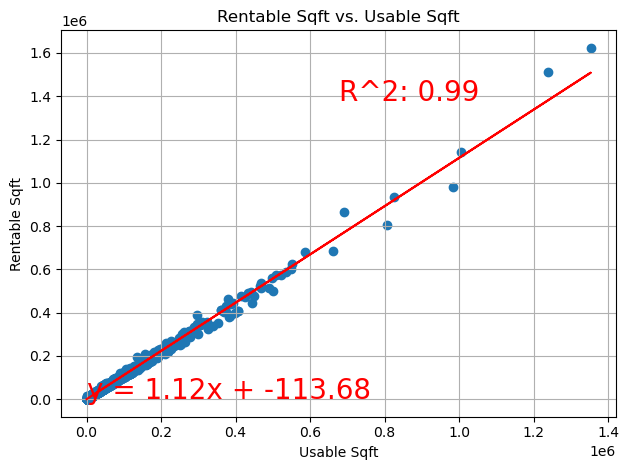

In [21]:
#Analyze Usable and Rentable Sqft
scatterregression(clean_data, "Usable Sqft","Rentable Sqft", "../Resources/UsablesqftvsRentablesqft.jpg")

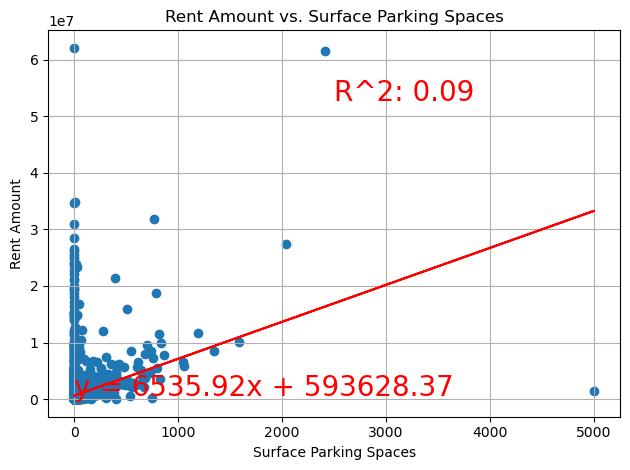

In [22]:
#Analyze Surface Parking Spaces and Rent Amount
scatterregression(clean_data, "Surface Parking Spaces","Rent Amount", "../Resources/SurfaceParkingSpacesvsRentAmount.jpg")

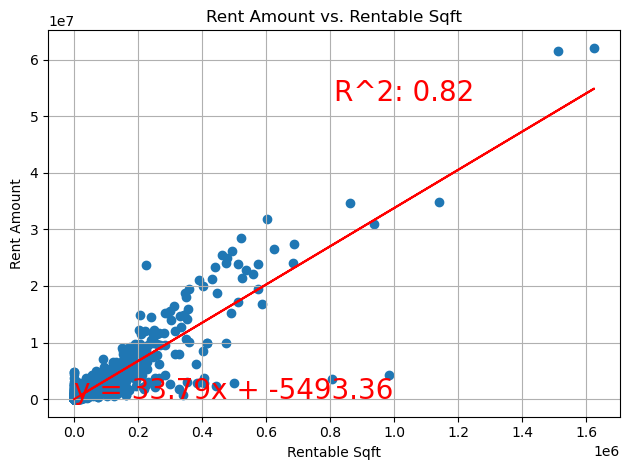

In [23]:
#Analyze Rentable Sqft and Rent Amount
scatterregression(clean_data, "Rentable Sqft","Rent Amount", "../Resources/RentablesqftvsRentAmount.jpg")

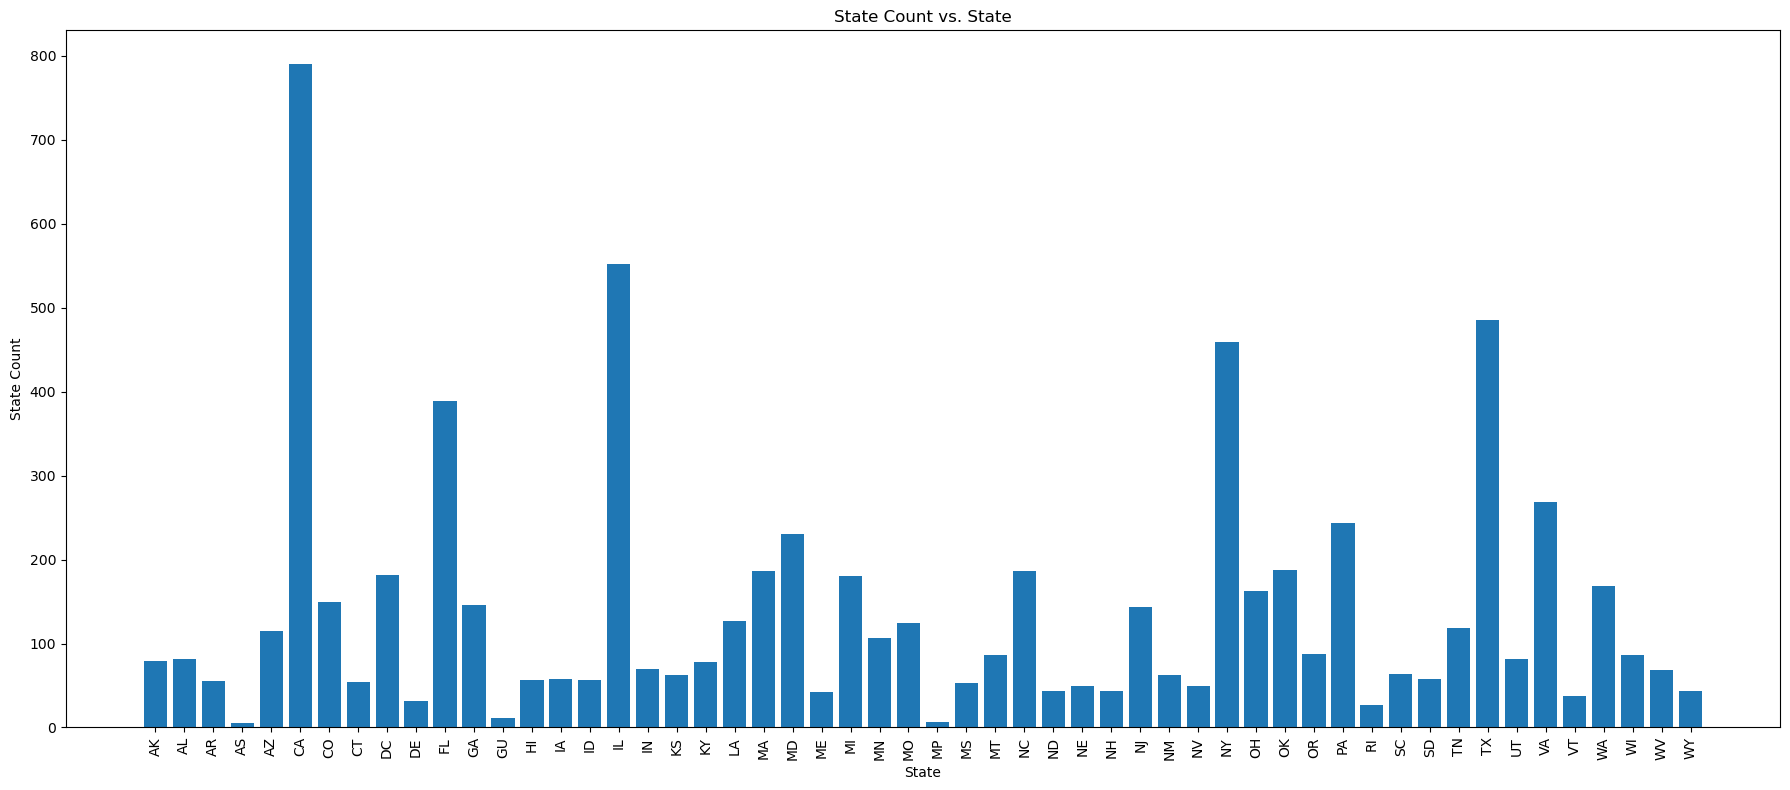

In [43]:
#Make Bar chart out of Lessor State
#Make a copy of the State column for count aggregation, then groupby State and function count
state_df = clean_data.copy()
state_df["State Count"] = state_df["State"]
state_df = state_df.groupby(["State"])["State Count"].count()
state_df = state_df.to_frame()
state_df = state_df.reset_index()


x_axis = [j for j in range(0,len(state_df))]
tick_locations = [value for value in x_axis]
names = [state for state in state_df["State"]]

plt.figure(figsize = (18,8))
plt.bar(state_df["State"] , state_df["State Count"])
plt.xticks(tick_locations , names , rotation = 'vertical')
plt.xlabel("State")
plt.ylabel("State Count")
plt.title("State Count vs. State")

plt.savefig("../Resources/StateCountvsState.jpg")
plt.tight_layout()
plt.show()

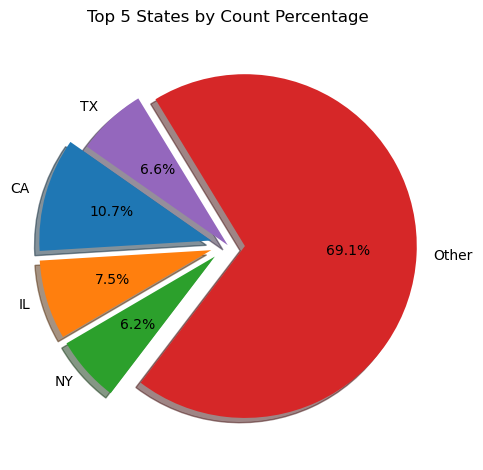

In [57]:
#Make a pie chart out of State Category
category_df = clean_data.copy()
category_df["State Category Count"] = category_df["State Category"]
category_df = category_df.groupby(["State Category"])["State Category Count"].count()
category_df = category_df.reset_index()

labels = list(category_df["State Category"].unique())
sizes = category_df["State Category Count"]
explode = (0.1,0.1,0.1,0.1,0)

plt.pie(sizes,explode = explode , labels = labels , autopct = "%1.1f%%" , shadow = True , startangle = 145)
plt.title("Top 5 States by Count Percentage")
plt.tight_layout()
plt.savefig("../Resources/StateCategoryPieChart.jpg")
plt.show()

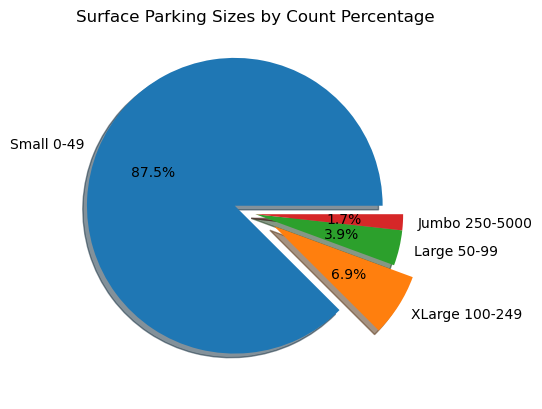

In [59]:
#Make Pie Chart for Surface Parking Spaces

parkingspacelabels = clean_data["Surface Sizes"].unique().tolist()
parkingspacesizes = clean_data["Surface Sizes"].value_counts().to_frame()["count"].to_list()
parkingexplode = (0.15,0.15,0,0)

plt.pie(parkingspacesizes , explode = parkingexplode , labels = parkingspacelabels , autopct = "%1.1f%%" , shadow = True)
plt.title("Surface Parking Sizes by Count Percentage")
plt.savefig("../Resources/SurfaceParkingSizesCount.jpg")
plt.show()

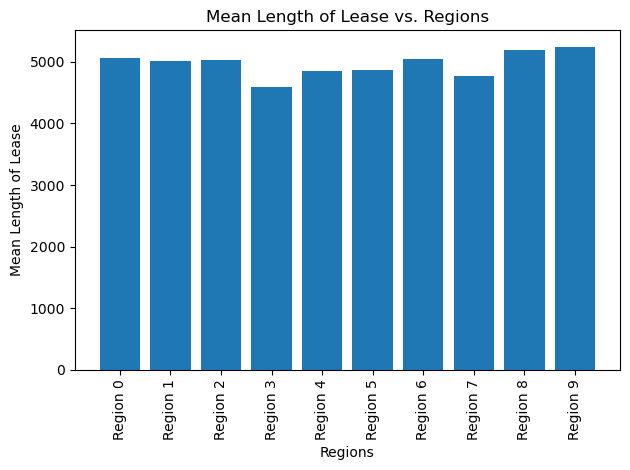

In [62]:
#Make a bar chart based on Aggregations for Regions and Length of Lease
regions_lol = clean_data.groupby(["Regions"])["Length of Lease"].mean().reset_index()

plt.bar(regions_lol["Regions"],regions_lol["Length of Lease"])
plt.xticks(rotation = 'vertical')
plt.xlabel("Regions")
plt.ylabel("Mean Length of Lease")
plt.title("Mean Length of Lease vs. Regions")
plt.savefig("../Resources/MeanLolvsRegions.jpg")
plt.tight_layout()
plt.show()

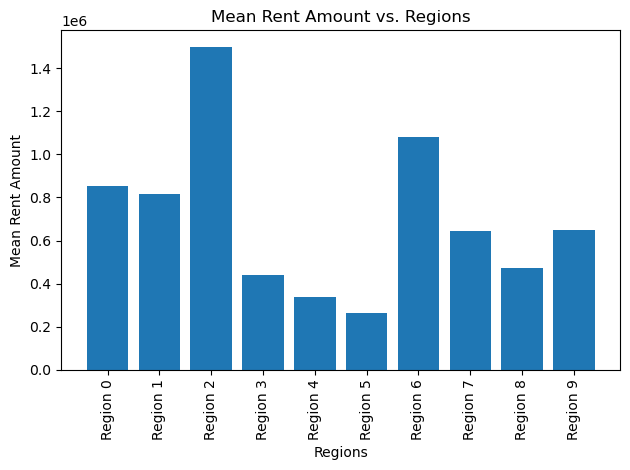

In [64]:
#Make a bar chart based off of Aggregations of Regions and Rent Amount

regions_rent = clean_data.groupby(["Regions"])["Rent Amount"].mean().reset_index()

plt.bar(regions_rent["Regions"],regions_rent["Rent Amount"])
plt.xticks(rotation = 'vertical')
plt.xlabel("Regions")
plt.ylabel("Mean Rent Amount")
plt.title("Mean Rent Amount vs. Regions")
plt.savefig("../Resources/MeanRentAmoountvsRegions.jpg")
plt.tight_layout()
plt.show()